In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import IPython.display as ipd
import librosa
import librosa.display

In [3]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FCB9-AF4E

 Directory of C:\Users\akram\OneDrive\Desktop\Work\Machine Learning\RNN model

03/14/2023  02:29 PM    <DIR>          .
03/14/2023  02:15 PM    <DIR>          ..
03/14/2023  02:29 PM    <DIR>          .ipynb_checkpoints
03/14/2023  02:21 PM    <DIR>          archive
03/14/2023  02:27 PM            61,978 RNN_model.ipynb
               1 File(s)         61,978 bytes
               4 Dir(s)  74,994,720,768 bytes free


In [5]:
import pandas as pd
import os
import librosa

metadata=pd.read_csv('bird_songs_metadata.csv')
metadata.head(10)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
5,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-8.wav
6,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-9.wav
7,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-11.wav
8,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-14.wav
9,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-15.wav


In [7]:
metadata['species'].value_counts()

melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: species, dtype: int64

In [9]:
audio_file = 'wavfiles/12996-6.wav'
y, sr = librosa.load(audio_file, sr=None)

# Get audio duration in seconds
duration = librosa.get_duration(y=y, sr=sr)

# Calculate number of frames
n_frames = int(sr * duration)

print(n_frames)
#66150

66150


In [11]:
def features_extractor(file):
    n_frames=120
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #++
    frames = np.array_split(mfccs_features.T, n_frames)
    features = np.concatenate(frames, axis=0)
    
    # Compute the mean of each feature across frames
    mean_features = np.mean(features, axis=0)                                
                                    
    
    return mean_features    

In [12]:
!dir

 Volume in drive C is OS
 Volume Serial Number is FCB9-AF4E

 Directory of C:\Users\akram\OneDrive\Desktop\Work\Machine Learning\RNN model

03/14/2023  02:31 PM    <DIR>          .
03/14/2023  02:15 PM    <DIR>          ..
03/14/2023  02:29 PM    <DIR>          .ipynb_checkpoints
03/14/2023  02:21 PM         2,061,097 bird_songs_metadata.csv
03/14/2023  02:31 PM            62,380 RNN_model.ipynb
03/14/2023  02:26 PM    <DIR>          wavfiles
               2 File(s)      2,123,477 bytes
               4 Dir(s)  74,985,115,648 bytes free


In [20]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath('wavfiles/'),row["filename"])                        
    final_class_labels=row["species"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

5422it [00:57, 94.77it/s] 


In [21]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-132.85225, 81.1399, 17.018225, 54.974297, -1...",bewickii
1,"[-147.74393, 99.42544, 20.885643, 44.118813, 1...",bewickii
2,"[-92.42778, 84.10635, 17.362778, 53.86046, -8....",bewickii
3,"[-93.07557, 81.17431, 16.225544, 52.08842, -8....",bewickii
4,"[-107.95914, 92.416, 17.773254, 43.13245, -1.8...",bewickii


In [50]:
### Split the dataset into independent and dependent dataset
X = np.array([f[0] for f in extracted_features])
y = np.array([f[1] for f in extracted_features])


In [23]:
X.shape

(5422, 40)

In [51]:
print(y)

['bewickii' 'bewickii' 'bewickii' ... 'cardinalis' 'cardinalis'
 'cardinalis']


In [52]:
# Reshape X to have a time dimension
n_frames = 120  # Replace this with the actual number of frames per audio clip
#X = X.reshape(X.shape[0], n_frames, X.shape[1])

# Convert y to one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = y.reshape(-1, 1)
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()


In [53]:
print(y)
print(y.shape)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
(5422, 5)


In [30]:
#from tensorflow.keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))

In [59]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape

(4337, 40)

In [32]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from sklearn import metrics
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [93]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(40, 1), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(5, activation='softmax'))

In [94]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 40, 64)            16896     
                                                                 
 lstm_20 (LSTM)              (None, 64)                33024     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 5)                 325       
                                                                 
Total params: 54,405
Trainable params: 54,405
Non-trainable params: 0
_________________________________________________________________


In [95]:
X_train = np.resize(X_train, (4337, 40, 1))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [96]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

Epoch 1/100
135/136 [============================>.] - ETA: 0s - loss: 1.5914 - accuracy: 0.2396
Epoch 1: val_loss improved from inf to 1.56031, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 9s 42ms/step - loss: 1.5916 - accuracy: 0.2391 - val_loss: 1.5603 - val_accuracy: 0.2885
Epoch 2/100
135/136 [============================>.] - ETA: 0s - loss: 1.5466 - accuracy: 0.2970
Epoch 2: val_loss improved from 1.56031 to 1.48452, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 5s 35ms/step - loss: 1.5460 - accuracy: 0.2972 - val_loss: 1.4845 - val_accuracy: 0.3502
Epoch 3/100
136/136 [==============================] - ETA: 0s - loss: 1.4542 - accuracy: 0.3689
Epoch 3: val_loss improved from 1.48452 to 1.36936, saving model to saved_models\audio_classification.hdf5
136/136 [==============================] - 5s 35ms/step - loss: 1.4542 - accuracy: 0.3689 - val_loss: 1.3694 - val_accuracy: 0.4

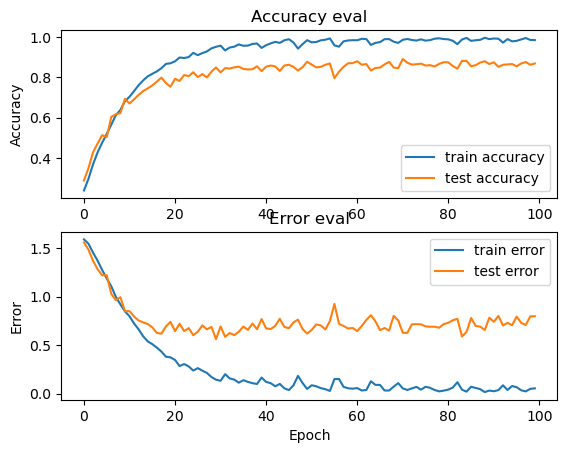

Training completed in time:  0:08:22.137671


In [97]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 


num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history =model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
plot_history(history)

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])